# Овсянников Андрей
# Проект по Анализу маркетинговых компаний банка <br>
## Задача : спрогнозировать продажу банковского продукта<br>
##  Часть 1. Описание набора данных и признаков
<br>
Данные взяты из http://archive.ics.uci.edu/ml/datasets/Bank+Marketing.<br>
<br>
   ### общие данные о клиенте: <br>
   1 - age (int) -возраст <br>
   2 - job (nvarchar) : должность <br>
   3 - marital(nvarchar) : семейное положение <br>
   4 - education(nvarchar) : образование <br>
   5 - default (nvarchar):  была ли просрочка по кредиту <br>
   6 - housing (nvarchar): брал ипотеку <br>
   7 - loan (nvarchar): брал потреб кредит  <br>
   ### текущая компания: <br>
   8 - contact (nvarchar): ТИП контакта  <br>
   9 - month(nvarchar): когда последний раз была рассылка в месяцах <br>
  10 - day_of_week(nvarchar): последний раз была рассылка в названиях дней <br>
  11 - duration (int): длительность звонка <br>
   ### дополнительная информация о коипаниях: <br>
  12 - campaign(int):количество контактов произведенных в течении данной компании для данного клиента <br>
  13 - pdays(int): количество дней прошедших с момента последнего контакта с клиентом (999 никогда) <br>
  14 - previous(int): предыдущее количество контактов с клиентом до текущей компании<br>
  15 - poutcome(nvarchar): результаты предыдущей маркетинговой компании (справочник: "failure","nonexistent","success")<br>
   ### Социальные и экономическикие атрибуты<br>
  16 - emp.var.rate(float): показатель изменения занятости - ежеквартальный показатель<br>
  17 - cons.price.idx(float): индекс потребительских цен - ежемесячный показатель<br>
  18 - cons.conf.idx(float): индекс потребительского доверия  - ежемесячный показатель<br>
  19 - euribor3m(float): ставка 3 месячная euribor- ежедневный показатель<br>
  20 - nr.employed(int): количество сотрудников - ежеквартальный показатель<br>

  ### Результат:<br>
  21 - y (bool) - произошла ли продажа(справочник: "yes","no")<br>



In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.grid_search import GridSearchCV
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv('./bank-additional-full.csv',sep=';')
df.head().T
base_df=df

###  Часть 2. Первичный анализ признаков

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

есть количественные(float64) признаки, номинальные(object) признаки и количественные/бинарные(int64) признаки. 

In [4]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188,NaN,NaN,NaN,40.0241,10.4212,17,32,38,47,98
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные не содержат пропуски. Нужно убрать часть признаков

По номинальным признакам

In [5]:
nominal_stats = ['Количество', 'Уникальных значений', 'Макс используемое значение', 'Макс используемое значение количество']
df_nominal = pd.DataFrame([], [], columns=nominal_stats)
for col, typ in df.dtypes.iteritems():
    if typ == np.object:
        nominal_feature = df[col]
        df_nominal.loc[col] = [
            nominal_feature.count(),
            nominal_feature.nunique(),
            nominal_feature.value_counts().head(1).index[0],
            nominal_feature.value_counts().head(1).values[0]]
        
df_nominal

,Количество,Уникальных значений,Макс используемое значение,Макс используемое значение количество
job,41188.0,12.0,admin.,10422.0
marital,41188.0,4.0,married,24928.0
education,41188.0,8.0,university.degree,12168.0
default,41188.0,3.0,no,32588.0
housing,41188.0,3.0,yes,21576.0
loan,41188.0,3.0,no,33950.0
contact,41188.0,2.0,cellular,26144.0
month,41188.0,10.0,may,13769.0
day_of_week,41188.0,5.0,thu,8623.0
poutcome,41188.0,3.0,nonexistent,35563.0


Данные не содержат пропуски.
Так же имеются признаки, которые могут быть бинарными (Уникальных значений=  2;3)


In [6]:
for col in df_nominal[(df_nominal['Уникальных значений']==2)].T.columns:
    print('Признак "{}":\n{}\n'.format(col, df[col].value_counts()))
for col in df_nominal[(df_nominal['Уникальных значений']==3)].T.columns:
    print('Признак "{}":\n{}\n'.format(col, df[col].value_counts()))

Признак "contact":
cellular     26144
telephone    15044
Name: contact, dtype: int64

Признак "y":
no     36548
yes     4640
Name: y, dtype: int64

Признак "default":
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Признак "housing":
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

Признак "loan":
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

Признак "poutcome":
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64



In [7]:
#c признаком контакт нет смысла производить преобразования
# тк наличие кредитов и просрочки банк может проверить через бюро, то произведем манипуляции со значениями 
dict_map = dict()
y_map = {'yes':1,'no':0}
dict_map['y'] = y_map
df = df.replace(dict_map)

In [8]:
pdays_clear = (df.pdays == -1).astype(int)
pdays_clear.name = "pdays_clear"
df.pdays[df.pdays==-1] = NaN
df.pdays = df.pdays.fillna(value = df.pdays.median())


In [9]:
dict_map = dict()
loan_map = {'yes':1,'no':0,'unknown':0}
dict_map['loan'] = loan_map
df = df.replace(dict_map)

In [10]:
dict_map = dict()
housing_map = {'yes':1,'no':0,'unknown':0}
dict_map['housing'] = housing_map
df = df.replace(dict_map)

In [11]:
dict_map = dict()
default_map = {'yes':1,'no':0,'unknown':0}
dict_map['default'] = default_map
df = df.replace(dict_map)

In [12]:
binary_features = ['contact', 'y','default','housing','loan']
n_features = [feature for feature in df_nominal.index if feature not in binary_features]
q_features = [
    feature for feature in df.columns if feature not in binary_features \
              and feature not in n_features 
]

In [13]:
print('Имеем ',len(q_features),'количественных признаков (',q_features,'),',len(binary_features),' бинарных признаков с целочисленными и текстовыми значениями (',binary_features,'), а так же',len(n_features),' номинальных признаков c текстовыми значениями(',n_features,').')

Имеем  10 количественных признаков ( ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] ), 5  бинарных признаков с целочисленными и текстовыми значениями ( ['contact', 'y', 'default', 'housing', 'loan'] ), а так же 6  номинальных признаков c текстовыми значениями( ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome'] ).


###  Часть 3. Первичный визуальный анализ признаков

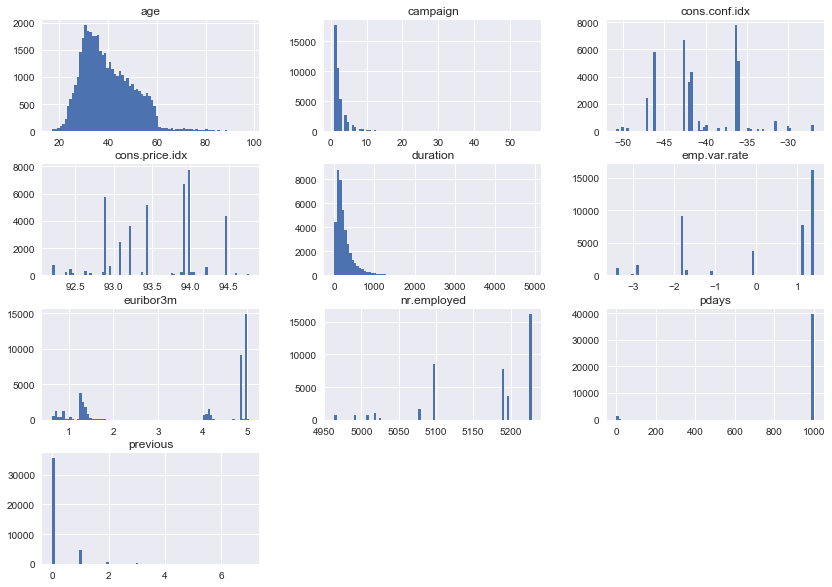

In [14]:
df[q_features[:10]].hist(figsize=(14,10), bins=80);

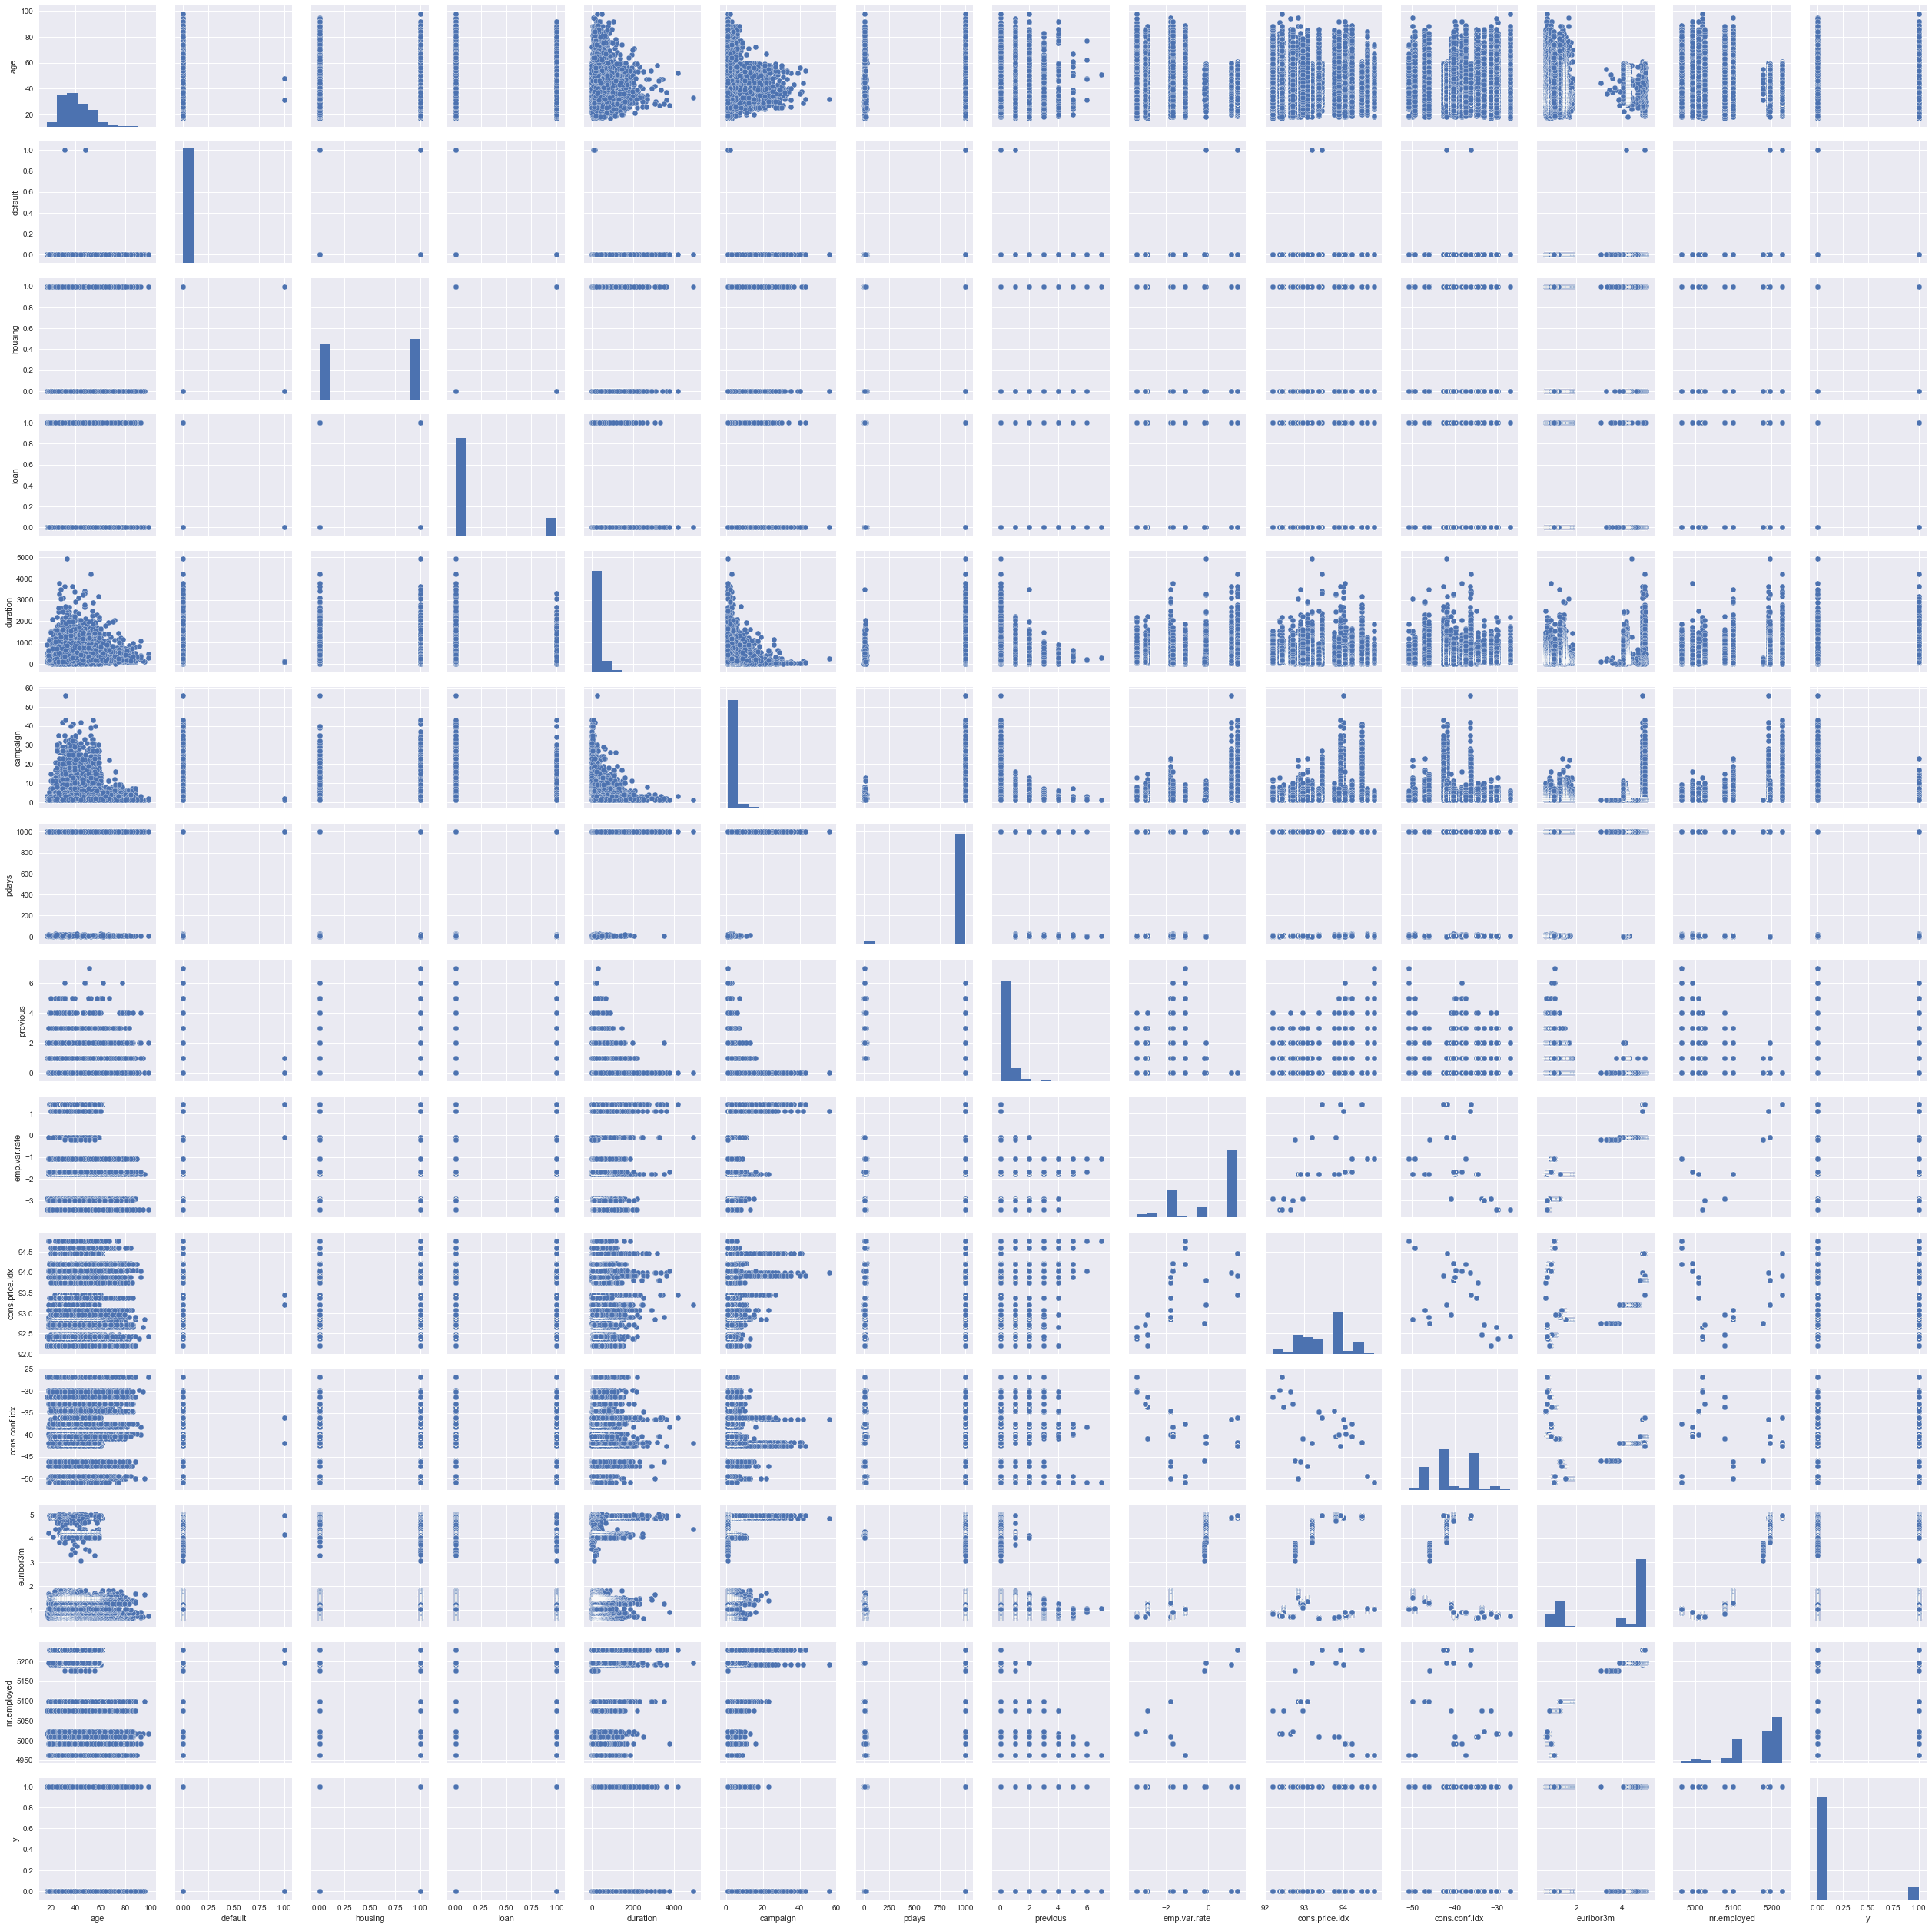

In [15]:
sns.pairplot(df)

In [16]:
predictors = list(set(df.columns) - set('y'))
corr = df[predictors].corr()

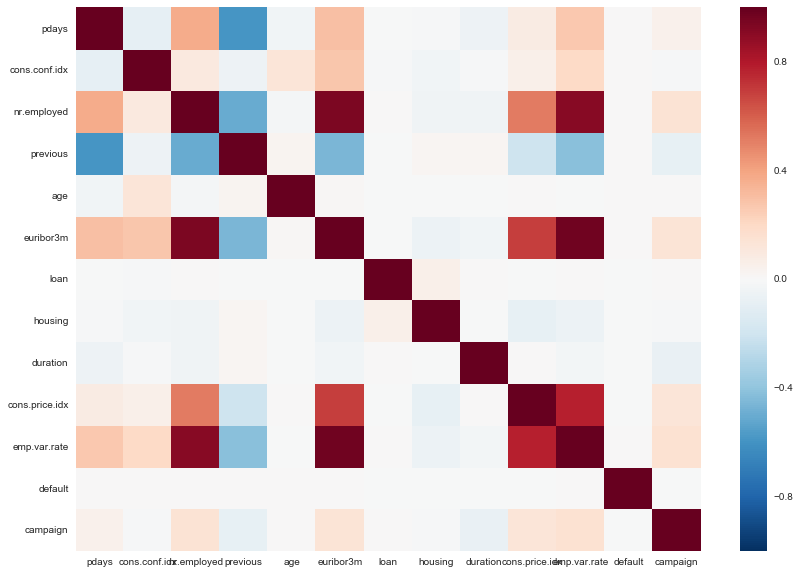

In [17]:
figsize(14, 10)
sns.heatmap(corr)

In [18]:
corr

,pdays,cons.conf.idx,nr.employed,previous,age,euribor3m,loan,housing,duration,cons.price.idx,emp.var.rate,default,campaign
pdays,1.000000,-0.091342,0.372605,-0.587514,-0.034369,0.296899,-0.000086,-0.010719,-0.047577,0.078889,0.271004,0.001668,0.052584
cons.conf.idx,-0.091342,1.000000,0.100513,-0.050936,0.129372,0.277686,-0.013673,-0.034496,-0.008173,0.058986,0.196041,0.004492,-0.013733
nr.employed,0.372605,0.100513,1.000000,-0.501333,-0.017725,0.945154,0.004205,-0.045046,-0.044703,0.522034,0.906970,0.005941,0.144095
previous,-0.587514,-0.050936,-0.501333,1.000000,0.024365,-0.454494,-0.002143,0.020446,0.020640,-0.203130,-0.420489,0.002766,-0.079141
age,-0.034369,0.129372,-0.017725,0.024365,1.000000,0.010767,-0.007198,-0.001414,-0.000866,0.000857,-0.000371,0.001891,0.004594
euribor3m,0.296899,0.277686,0.945154,-0.454494,0.010767,1.000000,-0.000487,-0.058913,-0.032897,0.688230,0.972245,0.005274,0.135133
loan,-0.000086,-0.013673,0.004205,-0.002143,-0.007198,-0.000487,1.000000,0.056651,0.000121,-0.005944,0.001193,-0.003609,0.005294
housing,-0.010719,-0.034496,-0.045046,0.020446,-0.001414,-0.058913,0.056651,1.000000,-0.006804,-0.081920,-0.059862,-0.003256,-0.010800
duration,-0.047577,-0.008173,-0.044703,0.020640,-0.000866,-0.032897,0.000121,-0.006804,1.000000,0.005312,-0.027968,-0.005101,-0.071699
cons.price.idx,0.078889,0.058986,0.522034,-0.203130,0.000857,0.688230,-0.005944,-0.081920,0.005312,1.000000,0.775334,-0.003141,0.127836


##  Часть 2. Описание набора данных и признаков
####Уточнения:
    описание предобработки данных (замена пропусков, шкалирование и изменение признаков и т.д.)  – 3 балла

         Здесь описываются все шаги по подготовке данных к обучению - замены строк на числа, OheHotEncoding, масштабирование и т.д. Тут может быть и PCA и TSNE. 

    если создаются признаки, то описание этого процесса  – 3 балла

          Это творческий процесс – придумать новые признаки, которые повышали бы качество модели

    если признаки отбираются из имеющихся, то описание этого процесса  – 1.5 балла

          Более актуально, если признаков много, но даже если их мало, может оказаться, что не все они нужны. 

    кросс-валидация – 3 балла

         Здесь самый важный момент: масштабирование выборки и добавление новых признаков (если надо) проводить внутри кросс-валидации, а не перед ней для всей выборки

    построение кривых валидации и обучения – 4.5 балла

          Если данных много и строить такие кривые дорого, то можно по подвыборке

    если есть тестовая выборка, прогноз для нее, иначе - для оставленной выборки – 1.5 балла

          Если данных много, то процентов 20-30 выборки всегда стоит оставлять для конечной проверки модели

    оценка модели с описанием выбранной метрики (+ объяснение)  – 1.5 балла

          Тут уточните такие моменты, как число классов, дисбаланс классов, почему выбрана та или иная метрика

    выводы – 2 балла

          Здесь прорезюмируйте сделанную работу. И, если решалась бизнес-задача, опишите, какова бизнес-ценность построенного 

###  Часть 5. Предобработка данных 
 



In [19]:
def classAge(age):
    if (age<25): return  1
    elif (age<45)&(age>=25): return 2
    else: return 3   
     

In [20]:
#Сформируем возрастные категории
df['ageCluster']=df['age'].apply(classAge)


In [21]:
def hasContact(pdays):
    if (pdays==999): return  0
    else: return 1

In [22]:
# отстутствие звонков выведем в отдельную переменную
df['Contacted']=df['pdays'].apply(hasContact)

In [23]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,ageCluster,Contacted
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3,0


In [24]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df.marital.drop_duplicates()) 
dicts['marital'] = list(label.classes_)
df.marital = label.transform(df.marital) 


In [25]:
label.fit(df.job.drop_duplicates()) 
dicts['job'] = list(label.classes_)
df.job = label.transform(df.job) 

In [26]:
label.fit(df.education.drop_duplicates()) 
dicts['education'] = list(label.classes_)
df.education = label.transform(df.education) 

In [27]:
label.fit(df.default.drop_duplicates()) 
dicts['default'] = list(label.classes_)
df.default = label.transform(df.default) 

In [28]:
label.fit(df.housing.drop_duplicates()) 
dicts['housing'] = list(label.classes_)
df.housing = label.transform(df.housing)

In [29]:
label.fit(df.loan.drop_duplicates()) 
dicts['loan'] = list(label.classes_)
df.loan = label.transform(df.loan)

In [30]:
label.fit(df.contact.drop_duplicates()) 
dicts['contact'] = list(label.classes_)
df.contact = label.transform(df.contact)

In [31]:
label.fit(df.poutcome.drop_duplicates()) 
dicts['poutcome'] = list(label.classes_)
df.poutcome = label.transform(df.poutcome)

In [32]:
label.fit(df.month.drop_duplicates()) 
dicts['month'] = list(label.classes_)
df.month = label.transform(df.month)

In [33]:
label.fit(df.day_of_week.drop_duplicates()) 
dicts['day_of_week'] = list(label.classes_)
df.day_of_week = label.transform(df.day_of_week)

## Проверим влияние признаков

In [34]:
from sklearn.cross_validation import train_test_split

In [35]:
target = df.y
train = df.drop(['y'], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train, target ,
                                                    test_size=0.3, 
                                                    random_state=17)


In [37]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
features=pd.DataFrame(model.feature_importances_,
                        index=X_train.columns, 
                        columns=['Importance']).sort(['Importance'], 
                                                     ascending=False)
features

,Importance
duration,2.515682e-01
euribor3m,1.099832e-01
age,8.546464e-02
campaign,5.905566e-02
education,5.761632e-02
job,5.680383e-02
nr.employed,4.989573e-02
day_of_week,4.878860e-02
pdays,3.334732e-02
poutcome,3.159152e-02


<font color="red">Нужно удалить из фрейма duration и перестроить модели тк сильное влияние, а во время звонка эта переменная не известна а так же age и pdays тк мы ввели классификатор

In [38]:
df1=df.drop(['pdays','age','duration'], axis=1)

In [39]:
target = df1.y
train = df1.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, target ,
                                                    test_size=0.3, 
                                                    random_state=17)

In [40]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
features=pd.DataFrame(model.feature_importances_,
                        index=X_train.columns, 
                        columns=['Importance']).sort(['Importance'], 
                                                     ascending=False)
features

,Importance
euribor3m,0.152090
campaign,0.133123
job,0.119432
education,0.108654
day_of_week,0.077551
marital,0.059493
nr.employed,0.043889
emp.var.rate,0.043453
Contacted,0.041840
ageCluster,0.036009


In [41]:
predictors = list(set(df1.columns) - set('y'))
corr = df1[predictors].corr()
corr

,job,cons.conf.idx,nr.employed,poutcome,previous,euribor3m,loan,day_of_week,housing,education,marital,cons.price.idx,contact,month,emp.var.rate,default,ageCluster,campaign,Contacted
job,1.000000,0.052760,-0.019574,0.011504,0.020965,-0.007880,-0.010246,-0.000844,0.006904,0.134121,0.027897,-0.016017,-0.025132,-0.033213,-0.008271,0.013317,-0.017747,-0.006923,0.028466
cons.conf.idx,0.052760,1.000000,0.100513,0.178289,-0.050936,0.277686,-0.013673,0.041465,-0.034496,0.078799,-0.033783,0.058986,0.251614,0.009652,0.196041,0.004492,0.102332,-0.013733,0.091254
nr.employed,-0.019574,0.100513,1.000000,0.119689,-0.501333,0.945154,0.004205,0.028380,-0.045046,-0.041492,-0.086199,0.522034,0.269155,-0.221425,0.906970,0.005941,0.048573,0.144095,-0.372682
poutcome,0.011504,0.178289,0.119689,1.000000,-0.313110,0.184144,-0.000237,0.018732,-0.010698,0.017009,0.001912,0.211330,0.118744,-0.065012,0.192972,-0.006196,0.017874,0.032586,0.475203
previous,0.020965,-0.050936,-0.501333,-0.313110,1.000000,-0.454494,-0.002143,-0.004102,0.020446,0.038831,0.038689,-0.203130,-0.212848,0.103157,-0.420489,0.002766,-0.011844,-0.079141,0.587462
euribor3m,-0.007880,0.277686,0.945154,0.184144,-0.454494,1.000000,-0.000487,0.039043,-0.058913,-0.036380,-0.091939,0.688230,0.399773,-0.117264,0.972245,0.005274,0.065728,0.135133,-0.296920
loan,-0.010246,-0.013673,0.004205,-0.000237,-0.002143,-0.000487,1.000000,-0.009483,0.056651,0.008351,0.006396,-0.005944,-0.013367,-0.007073,0.001193,-0.003609,-0.001737,0.005294,0.000066
day_of_week,-0.000844,0.041465,0.028380,0.018732,-0.004102,0.039043,-0.009483,1.000000,0.003251,-0.017986,0.002202,0.005644,-0.009575,0.027677,0.033245,0.006079,-0.014693,-0.038288,0.009507
housing,0.006904,-0.034496,-0.045046,-0.010698,0.020446,-0.058913,0.056651,0.003251,1.000000,0.017970,0.010726,-0.081920,-0.084472,-0.018842,-0.059862,-0.003256,-0.003731,-0.010800,0.010687
education,0.134121,0.078799,-0.041492,0.017009,0.038831,-0.036380,0.008351,-0.017986,0.017970,1.000000,0.109220,-0.081607,-0.105726,-0.082684,-0.043778,0.002342,-0.087456,0.000371,0.046610


In [42]:
CorField = []
for i in corr:
    for j in corr.index[corr[i] > 0.9]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print ("%s-->%s: r^2=%f" % (i,j, corr[i][corr.index==j].values[0]))

nr.employed-->euribor3m: r^2=0.945154
nr.employed-->emp.var.rate: r^2=0.906970


Удалим дополнительно emp.var.rate,euribor3m тк корреляция высокая

In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df1=df1.drop(['emp.var.rate','euribor3m'], axis=1)
target = df1.y
train = df1.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, target ,
                                                    test_size=0.3, 
                                                    random_state=17)


###  Часть 6. Построение признаков

In [44]:
scaler = StandardScaler()
df1_scaller = pd.DataFrame(scaler.fit_transform(train))
df1_scaller.columns

RangeIndex(start=0, stop=17, step=1)

In [45]:
test

<bound method NoseTester.test of <numpy.testing.nosetester.NoseTester object at 0x0000020F96CEA0F0>>

In [46]:

X_train, X_test, y_train, y_test = train_test_split(train,target,random_state=17,test_size=0.3)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df1_scaller,target,random_state=17,test_size=0.3)

###  Часть 7. Отбор признаков см выше

##  Часть 8. Построение модели

In [47]:
from sklearn import cross_validation, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

In [98]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge,LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)
print("Model Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

model_s=LinearRegression()
model_s.fit(X_train_s,y_train_s)

# The mean squared error
print("Model_S Mean squared error: %.2f"
      % np.mean((model_s.predict(X_test_s) - y_test_s) ** 2))
# Explained variance score: 1 is perfect prediction
print('Model_S Variance score: %.2f' % model_s.score(X_test_s, y_test_s))


Model Mean squared error: 0.08
Variance score: 0.20
Model_S Mean squared error: 0.08
Model_S Variance score: 0.20


In [97]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
print("Model Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Model Variance score: %.2f' % model.score(X_test, y_test))
model_s=KNeighborsClassifier()
model_s.fit(X_train_s,y_train_s)
# The mean squared error
print("Model_S Mean squared error: %.2f"
      % np.mean((model_s.predict(X_test_s) - y_test_s) ** 2))
# Explained variance score: 1 is perfect prediction
print('Model_S Variance score: %.2f' % model_s.score(X_test_s, y_test_s))

Model Mean squared error: 0.11
Model Variance score: 0.89
Model_S Mean squared error: 0.11
Model_S Variance score: 0.89


In [99]:
model=svm.SVC()
model.fit(X_train,y_train)

# The mean squared error
print("Model Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Model Variance score: %.2f' % model.score(X_test, y_test))
#Проверим на масштабированных данных
model_s=svm.SVC()
model_s.fit(X_train_s,y_train_s)

# The mean squared error
print("Model_S Mean squared error: %.2f"
      % np.mean((model_s.predict(X_test_s) - y_test_s) ** 2))
# Explained variance score: 1 is perfect prediction
print('Model_S Variance score: %.2f' % model_s.score(X_test_s, y_test_s))

Model Mean squared error: 0.11
Model Variance score: 0.89
Model_S Mean squared error: 0.10
Model_S Variance score: 0.90


###  Часть 9. CrossValidation

In [ ]:
from sklearn import cross_validation, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

In [100]:
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knc = KNeighborsClassifier()
gridscv = GridSearchCV(knc, param_grid={'n_neighbors': n_neighbors_array})
gridscv.fit(X_train, y_train)
best_cv_err = 1 - gridscv.best_score_
best_n_neighbors = gridscv.best_estimator_.n_neighbors
print (' best_cv_err: ',best_cv_err,' best_n_neighbors: ',best_n_neighbors)

 best_cv_err:  0.10648260552877109  best_n_neighbors:  15


In [101]:
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = svm.SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.09978842218445427
best C      =  100.0
best gamma  =  0.001


In [110]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
c_values = np.logspace(0.05, 1, 20)
logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1,scoring='roc_auc')
logit_searcher.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s finished


LogisticRegressionCV(Cs=array([  1.12202,   1.25893,   1.41254,   1.58489,   1.77828,   1.99526,
         2.23872,   2.51189,   2.81838,   3.16228,   3.54813,   3.98107,
         4.46684,   5.01187,   5.62341,   6.30957,   7.07946,   7.94328,
         8.91251,  10.     ]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='lbfgs', tol=0.0001, verbose=1)

In [114]:
logit_searcher.C_

array([ 7.94328235])

In [115]:
logit_searcher.scores_[1].max()

0.77793623105044074

In [116]:
print ('best C      = ', logit_searcher.C_)

best C      =  [ 7.94328235]


In [57]:
itog_val = {}

In [119]:
knc = KNeighborsClassifier( n_jobs=-1,n_neighbors=10) 
lr = LogisticRegression( random_state=17,n_jobs=-1,penalty='l2',max_iter=100,C=7.94328235, solver='lbfgs') 
svc = svm.SVC( random_state=17,gamma=0.1,C=1) 

In [120]:
scores = cross_validation.cross_val_score(knc, train, target)
itog_val['KNeighborsClassifier'] = scores.mean()
scores = cross_validation.cross_val_score(lr, train, target)
itog_val['LogisticRegression'] = scores.mean()
scores = cross_validation.cross_val_score(svc, train, target)
itog_val['SVC'] = scores.mean()

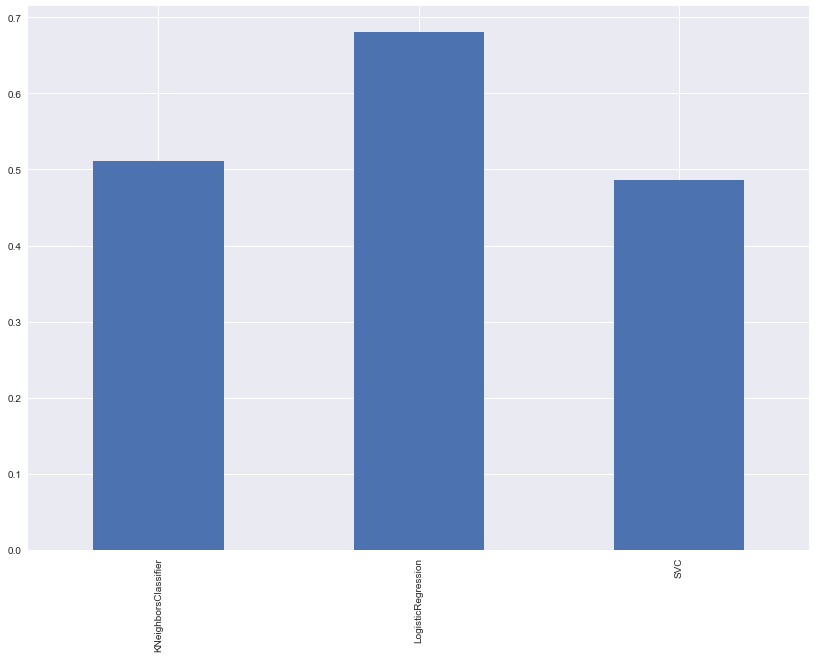

In [121]:
df.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

In [122]:
from sklearn.metrics import accuracy_score

In [132]:
lr.fit(X_train, y_train)
tp = lr.predict(X_test)
print('LR Model accuracy ',accuracy_score(y_test, tp))
lr.fit(X_train_s, y_train_s)
tp = lr.predict(X_test_s)
print('LR Model_S accuracy ',accuracy_score(y_test, tp))

LR Model accuracy  0.890831107874
LR Model_S accuracy  0.89973294489


In [130]:
knc.fit(X_train, y_train)
tp = knc.predict(X_test)
print('KNeighborsClassifier Model accuracy ',accuracy_score(y_test, tp))
knc.fit(X_train_s, y_train_s)
tp = knc.predict(X_test_s)
print('KNeighborsClassifier Model_S accuracy ',accuracy_score(y_test, tp))

KNeighborsClassifier Model accuracy  0.89131666262
KNeighborsClassifier Model_S accuracy  0.895282026382


In [133]:
svc.fit(X_train, y_train)
tp = svc.predict(X_test)
print('svc Model accuracy ',accuracy_score(y_test, tp))
svc.fit(X_train_s, y_train_s)
tp = svc.predict(X_test_s)
print('svc Model_S accuracy ',accuracy_score(y_test, tp))

svc Model accuracy  0.894472768471
svc Model_S accuracy  0.898033503277


## Кривые валидации и обучения

In [134]:
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve
def plot_with_std(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
        
def plot_learning_curve(clf, X, y, cv=5):
 
    train_sizes = np.linspace(0.05, 1, 20)
    n_train, val_train, val_test = learning_curve(clf,
                                                  X, y, train_sizes, cv=cv,
                                                  )
    plot_with_std(n_train, val_train, label='training scores', c='green')
    plot_with_std(n_train, val_test, label='validation scores', c='red')
    plt.xlabel('Training Set Size')
    plt.legend()

def plot_validation_curve(clf, X, y, cv_param_name, 
                          cv_param_values):

    val_train, val_test = validation_curve(clf, X, y, cv_param_name,
                                           cv_param_values, cv=5,
                                                  )
    plot_with_std(cv_param_values, val_train, 
                  label='training scores', c='green')
    plot_with_std(cv_param_values, val_test, 
                  label='validation scores', c='red')
    plt.xlabel(cv_param_name)
    plt.legend()

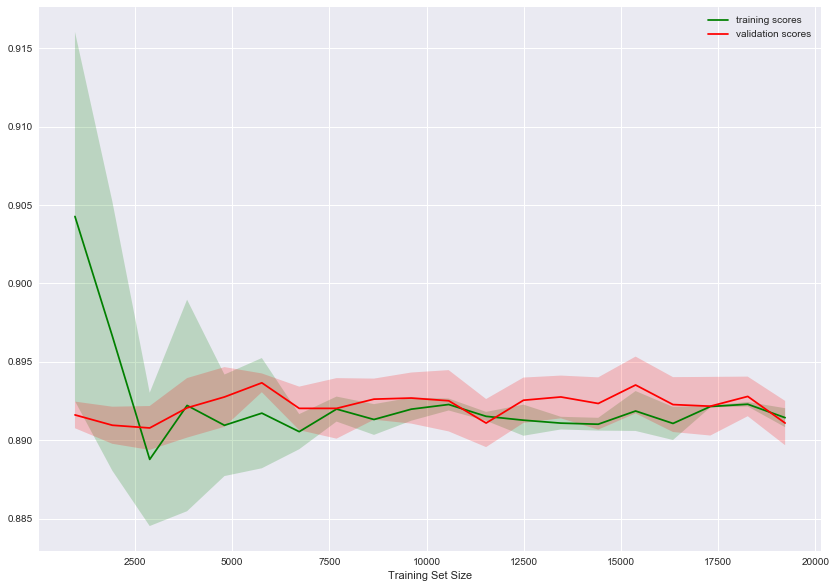

In [135]:
plot_learning_curve(LogisticRegression( random_state=17,n_jobs=-1,penalty='l2',max_iter=100,C=7.94328235, solver='lbfgs'),
                   X_train, y_train,  cv=3)

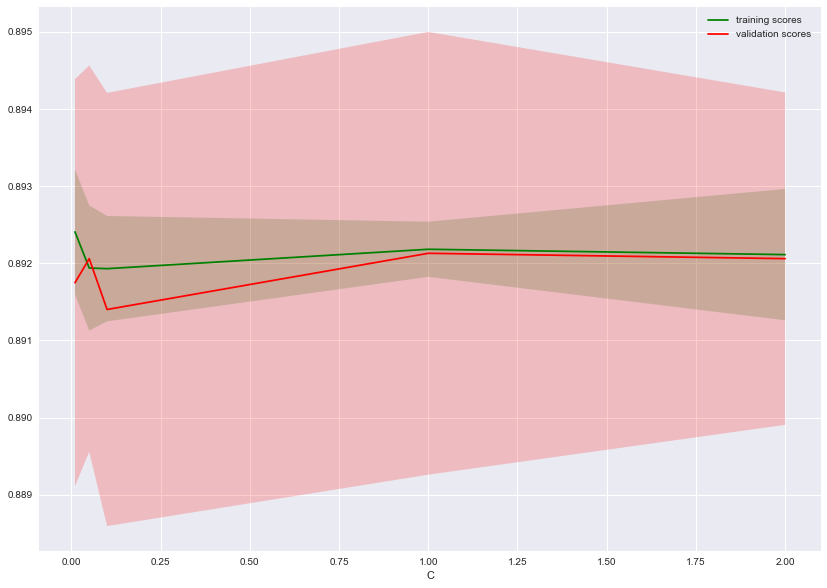

In [136]:
learning_rates = [0.01,0.05, 0.1,1, 2]
plot_validation_curve(LogisticRegression( random_state=17,n_jobs=-1,penalty='l2',max_iter=100,C=7.94328235, solver='lbfgs'), X_train, y_train, 
                    cv_param_name='C', 
                    cv_param_values=learning_rates)

###  Часть 11. Прогноз  выборк

In [137]:
%%time

model= LogisticRegression(random_state=17,n_jobs=-1,penalty='l2',max_iter=100,C=7.94328235, solver='lbfgs').fit(X_train_s,y_train_s)
rf_predict = model.predict(X_test_s)


Wall time: 3.25 s


In [138]:
accuracy_score(y_test_s, rf_predict)

0.89973294488953626

In [139]:
from sklearn.metrics import f1_score

In [140]:
f1_score(y_test_s, rf_predict)

0.33990410229088969

Выводы.

Построена модель продажи банковского продукта. 
Лучшие предсказания обеспечивает логическая регрессия
Модель предсказывает с ~90% вероятностью 
На отложенной выборке удалось F1=0.3399.
learning rate = 1 оптимальный
12500 примеров достаточно для обучения